# Predicting Autism Spectrum Disorder (ASD)

### Objectives

1. Explore data collected
2. Draw insights from trends
3. Predict ASD given some characteristics/features

### Project Objectives
This project is to build a **Machine Learning Model** to assist in predicting if an individual lives with Autism Spectrum Disorder or not.


### Table of Content
[**1. Data importation**](#1.Data-Gathering-and-Cleaning)

[**2. Exploratory data analysis, data cleaning, and Feature engineering**](#2.Exploratory-data-analysis,data-cleaning,and-Feature-Engineering)

[**3. Data preprocessing for modeling**](#3.Data-Preprocessing-for-Modeling)

[**4. Building different Classification models**](#4.Building-of-Models)

[**5. Model Evaluation**](#5.Model-Evaluation-and-Comparison)

[**6. Model selection**](#6.Implementing-the-Best-Model-on-the-Test-Data)

7. Feature importance

8. Summary

### Importing the Necessary Packages

In [5]:
%pip install bioinfokit

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
import warnings
warnings.filterwarnings('ignore')
from bioinfokit.analys import stat

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Importing the needed classes for building models,validation, and metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


## 1.Data-Gathering-and-Cleaning

### About the data

In [ ]:
# reading data
train_data = pd.read_csv(r"train.csv")
test_data = pd.read_csv(r"test.csv")
print(f"The train dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns")
print(f"The test dataset has {test_data.shape[0]} rows and {test_data.shape[1]} columns")

The train dataset has 800 rows and 22 columns
The test dataset has 200 rows and 21 columns


## 2.Exploratory-data-analysis,data-cleaning,and-Feature-Engineering

### Inspecting the data

In [ ]:
train_data['age'].head(10)

0    18
1    13
2    14
3    61
4    14
5    15
6    21
7    28
8    20
9    17
Name: age, dtype: int32

In [ ]:
train_data['A10_Score'].head(10)

0    1
1    1
2    1
3    0
4    1
5    0
6    0
7    0
8    0
9    1
Name: A10_Score, dtype: int64

In [ ]:
train_data.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
5,6,1,0,0,0,0,0,0,1,0,...,m,Asian,no,no,Nicaragua,no,7.445003,18 and more,?,0
6,7,1,1,1,1,1,1,0,1,0,...,f,White-European,no,no,Canada,no,12.598583,18 and more,Self,0
7,8,0,0,0,0,0,0,0,0,0,...,m,Middle Eastern,yes,no,United Arab Emirates,no,3.525720,18 and more,?,0
8,9,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,no,United Kingdom,no,11.902461,18 and more,Self,1
9,10,0,0,0,0,0,0,1,1,0,...,f,?,yes,no,United States,no,8.633346,18 and more,Self,1


**Columns**

+ **ID** - ID of the patient

+ **A1_Score to A10_Score** - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

+ **age** - Age of the patient in years

+ **gender** - Gender of the patient

+ **ethnicity** - Ethnicity of the patient

+ **jaundice** - Whether the patient had jaundice at the time of birth

+ **autism** - Whether an immediate family member has been diagnosed with autism

+ **country_of_res** - Country of residence of the patient

+ **used_app_before** - Whether the patient has undergone a screening test before

+ **result** - Score for AQ1-10 screening test

+ **age_desc** - Age of the patient

+ **relation** - Relation of patient who completed the test

+ **Class/ASD** - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

### Checking the data types of the different columns

In [ ]:
train_data.dtypes

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object

### A little data cleaning

In [ ]:
# fixing spelling mistakes 
train_data = train_data.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")
test_data = test_data.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

In [ ]:
# changing age datatype from float to int
train_data['age'] = train_data['age'].astype('int')
test_data['age'] = test_data['age'].astype('int')

### Checking for missing values

In [ ]:
train_data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

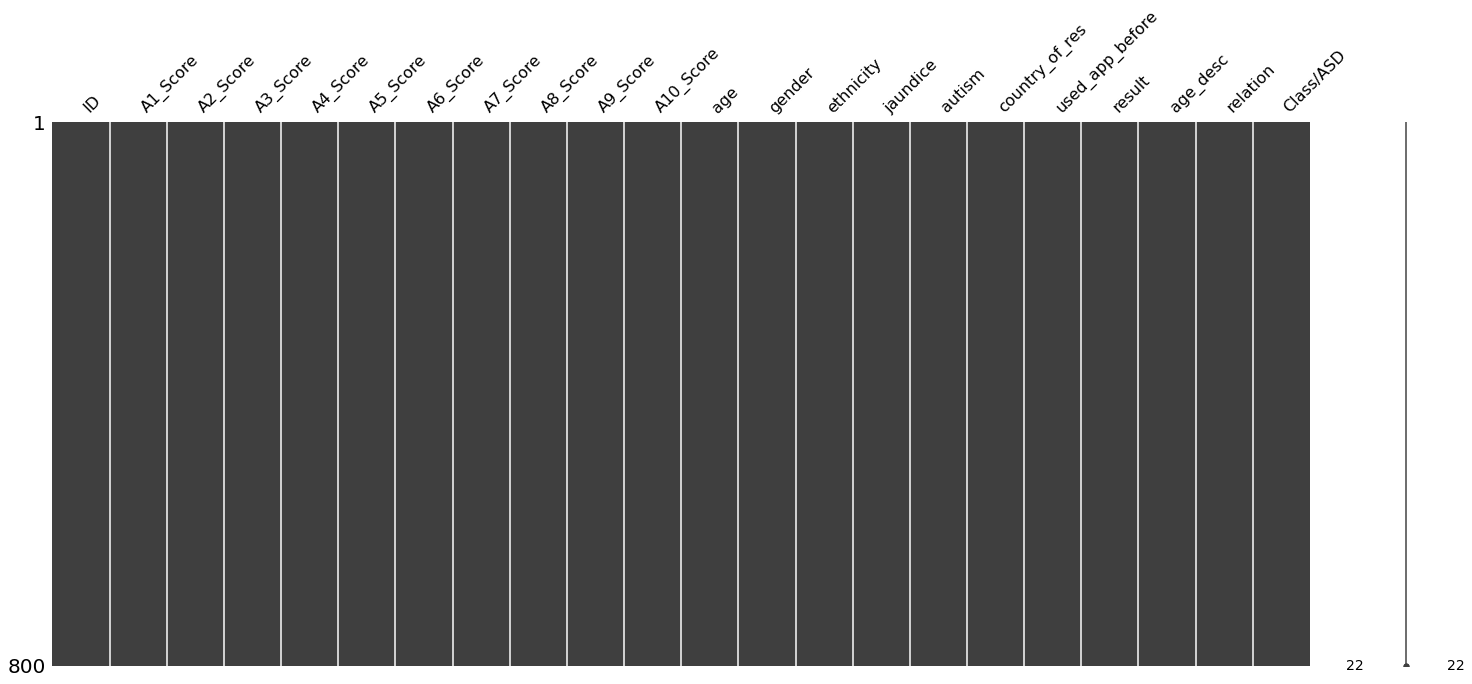

In [ ]:
# visualizing missing values
msno.matrix(train_data,color=(0.25, 0.25, 0.25))
plt.show()

* A brief inspection of the data reveals that there are no missing values

### Inspecting, Exploring and Cleaning Categorical variables

In [ ]:
categorical_var = train_data.select_dtypes(include = 'object')
numerical_var = train_data.select_dtypes(include = np.number)

In [ ]:
for cat in categorical_var:
    print(cat)

gender
ethnicity
jaundice
autism
country_of_res
used_app_before
age_desc
relation


In [ ]:
# function that updates datatype of columns in dataframe
def dtype_update(dataframe, columns, datatype):
    for column in columns:
        dataframe[str(column)] = dataframe[str(column)].astype(datatype)
        print(f"{column} datatype = {dataframe[str(column)].dtypes}")

In [ ]:
# updating columns with object dtype to category
dtype_update(train_data, categorical_var, 'category')

gender datatype = category
ethnicity datatype = category
jaundice datatype = category
autism datatype = category
country_of_res datatype = category
used_app_before datatype = category
age_desc datatype = category
relation datatype = category


In [ ]:
#more_cat_var = train_data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
#dtype_update(train_data, more_cat_var, 'category')

### Creating a function to explore the categorical variables

To easily explore the explore, the categorical variables a function created to give a quick numerical and graphical summary.


In [ ]:
# function to explore the categorical variables

def explore_cat(dataframe,column):
    '''
    This function returns a summary of a categorical variable
    '''
    unique_categories = dataframe[column].nunique()
    if unique_categories <= 5:
        print('Summary')
        print('====================================================')
        print(dataframe[column].describe(),'\n')
        sns.countplot(dataframe[column], palette='hls')
        plt.show()
        print('====================================================')
        print('Value counts \n')
        print(dataframe[column].value_counts(), '\n')
        print()
    else:
        print('Summary')
        print('====================================================')
        print(dataframe[column].describe(),'\n')
        sns.countplot(y=dataframe[column], palette='hls')
        plt.show()
        print('====================================================')
        print('Value counts \n')
        print(dataframe[column].value_counts(), '\n')
    

### Exploring Gender

Summary
count     800
unique      2
top         f
freq      415
Name: gender, dtype: object 



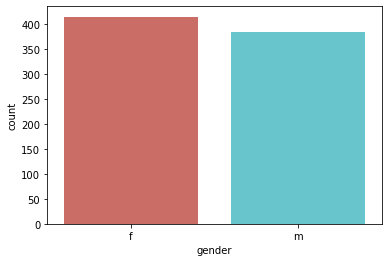

Value counts 

f    415
m    385
Name: gender, dtype: int64 




In [ ]:
explore_cat(train_data,'gender')

+ From exploring the gender variable, it is observed that there were two unique categories; male and female.
+ There are however more females than males but the difference is not significant hence we say they are fairly balanced.

### Exploring Ethnicity

Summary
count                800
unique                12
top       White-European
freq                 211
Name: ethnicity, dtype: object 



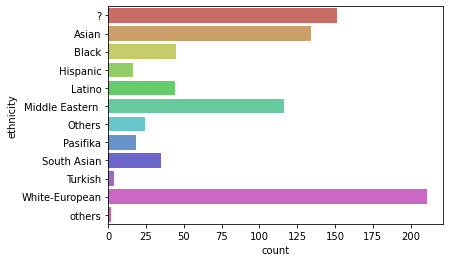

Value counts 

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64 



In [ ]:
explore_cat(train_data,'ethnicity')

+ It is observed that there were twelve unique categories including one with '?' which could be unknown/'prefer not to say'.
+ '?' category has the second highest count and therefore will not be dropped as very important information may be lost as a result
+ White Europeans had the highest count, followed by '?' and others having the least with a count of two.

### Exploring Jaundice

Summary
count     800
unique      2
top        no
freq      604
Name: jaundice, dtype: object 



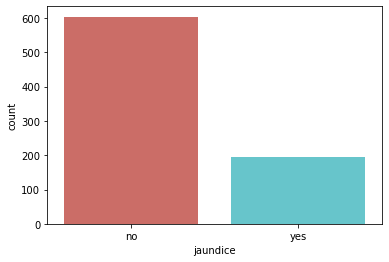

Value counts 

no     604
yes    196
Name: jaundice, dtype: int64 




In [ ]:
explore_cat(train_data,'jaundice')

+ The categories are imbalanced.The number of patients who did not have jaundice at birth are about 75.5% 

### Exploring Autism

Summary
count     800
unique      2
top        no
freq      683
Name: autism, dtype: object 



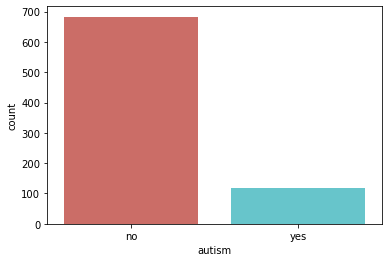

Value counts 

no     683
yes    117
Name: autism, dtype: int64 




In [ ]:
explore_cat(train_data,'autism')

+ The categories here are heavily imbalanced as well.
+ The number of patients who did not have an immediate family member being diagnosed with autism is about 85%
+ And 15% for patients who have an immediate family member being diagnosed with autism

### Exploring Country of Residence

In [ ]:
# explore_cat(train_data,'country_of_res')

In [ ]:
#sns.histplot(train_data['country_of_res']) 

### Exploring Used_App_Before

Summary
count     800
unique      2
top        no
freq      765
Name: used_app_before, dtype: object 



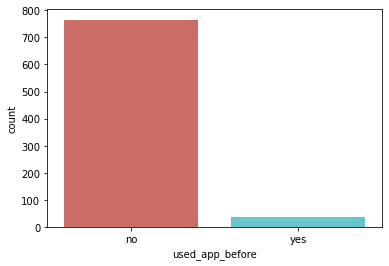

Value counts 

no     765
yes     35
Name: used_app_before, dtype: int64 




In [ ]:
explore_cat(train_data,'used_app_before')

+ From the graph, about 95% of the patients have not undergone a screening test before

### Exploring Age Description

Summary
count             800
unique              1
top       18 and more
freq              800
Name: age_desc, dtype: object 



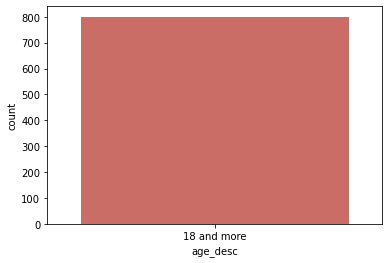

Value counts 

18 and more    800
Name: age_desc, dtype: int64 




In [ ]:
explore_cat(train_data,'age_desc')

+ There's only one category in this variable which says the same thing for all
+ This column will be dropped from the input features as there's already an age column and does not add any more necessary info

**Dropping 'age_desc' column**

In [ ]:
train_data.drop('age_desc', axis=1, inplace=True)

In [ ]:
train_data.shape

(800, 21)

### Exploring Relation

Summary
count      800
unique       6
top       Self
freq       617
Name: relation, dtype: object 



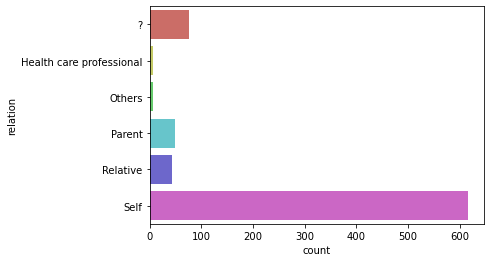

Value counts 

Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: relation, dtype: int64 



In [ ]:
explore_cat(train_data,'relation')

+ There are six unique categories of relations of patients who completed the test. 
+ The majority of about 77% completed the tests by themselves
+ Followed by '?' which we can assume to be anonymous or 'prefer not to say' at about 10%
+ Health care professionals and others have the least count with about 0.9% each

### Exploring target variable (Class/ASD)

Summary
count    800.000000
mean       0.231250
std        0.421896
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Class/ASD, dtype: float64 



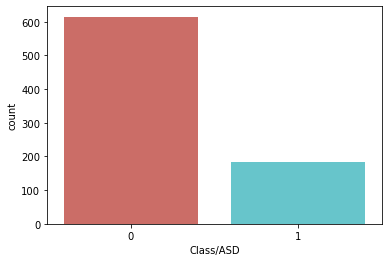

Value counts 

0    615
1    185
Name: Class/ASD, dtype: int64 




In [ ]:
explore_cat(train_data,'Class/ASD')

+ The target variable is highly imbalanced.
+ Patients who tested negative for ASD are about 77%


### Further Exploration of Categorical Variables

**Checking the association beween other categorical variables and Class/ASD with Chi-Square test**

In this section, Chi-Square test is carried out just to have an idea about the relationships among the categorical variables.

#### Chi-Square Test Function

In [ ]:
def chisq_test(df,x,y):
    '''
    This function displays conducts a chi-square test and displays the output
    '''
    table = pd.crosstab(df[x],df[y])
    test=stat()
    test.chisq(df=table)
    
    
    print('Null hypothesis: {} and {} are Independent'.format(x,y))
    print('Alternative hypothesis: {} and {} are Dependent\n'.format(x,y))
    print('Test results')
    print('='*55)
    print('Observed frequency values \n')
    print(table)
    
    print('*'*55)
    print(test.expected_df)
    print('*'*55)
    print(test.summary)

### Correlation between ASD Diagnosis and Gender

In [ ]:
chisq_test(train_data, 'Class/ASD', 'gender')

Null hypothesis: Class/ASD and gender are Independent
Alternative hypothesis: Class/ASD and gender are Dependent

Test results
Observed frequency values 

gender       f    m
Class/ASD          
0          298  317
1          117   68
*******************************************************

Expected frequency counts

           f         m
--  --------  --------
 0  319.031   295.969
 1   95.9688   89.0312

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       11.8726  0.000569665
Log-likelihood     1       11.9993  0.000532196



+ With chi square test you need a value of more than 0.05 in order to conclude the variables are independent of one another.

+ From the test results,the p_value is 0.000569665.

+ This implies that we must reject the null hypothesis and conclude the variables (Class/ASD and gender) are correlated.

### Correlation between ASD Diagnosis and Ethnicity

In [ ]:
chisq_test(train_data, 'Class/ASD', 'ethnicity')

Null hypothesis: Class/ASD and ethnicity are Independent
Alternative hypothesis: Class/ASD and ethnicity are Dependent

Test results
Observed frequency values 

ethnicity    ?  Asian  Black  Hispanic  Latino  Middle Eastern   Others  \
Class/ASD                                                                 
0          136    117     37        11      29              108      19   
1           15     17      8         5      15                8       5   

ethnicity  Pasifika  South Asian  Turkish  White-European  others  
Class/ASD                                                          
0                17           34        3             103       1  
1                 1            1        1             108       1  
*******************************************************

Expected frequency counts

           ?     Asian    Black    Hispanic    Latino    Middle Eastern     Others    Pasifika    South Asian    Turkish    White-European    others
--  --------  --------  -------  

+ From the test results,the p_value is 1.47082e-26.

+ This implies that we must reject the null hypothesis and conclude the variables (Class/ASD and ethnicity) are correlated.

### Correlation between ASD Diagnosis and having Jaundice at birth

In [ ]:
chisq_test(train_data, 'Class/ASD', 'jaundice')

Null hypothesis: Class/ASD and jaundice are Independent
Alternative hypothesis: Class/ASD and jaundice are Dependent

Test results
Observed frequency values 

jaundice    no  yes
Class/ASD          
0          492  123
1          112   73
*******************************************************

Expected frequency counts

         no      yes
--  -------  -------
 0  464.325  150.675
 1  139.675   45.325

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       28.0717  1.16901e-07
Log-likelihood     1       26.2143  3.05548e-07



+ From the test results,the p_value is 1.16901e-07.

+ This implies that we must reject the null hypothesis and conclude the variables (Class/ASD and jaundice) are correlated.

### Correlation between ASD Diagnosis and Family member of patient having Autism

In [ ]:
chisq_test(train_data, 'Class/ASD', 'autism')

Null hypothesis: Class/ASD and autism are Independent
Alternative hypothesis: Class/ASD and autism are Dependent

Test results
Observed frequency values 

autism      no  yes
Class/ASD          
0          570   45
1          113   72
*******************************************************

Expected frequency counts

         no      yes
--  -------  -------
 0  525.056  89.9437
 1  157.944  27.0562

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1      111.234   5.25803e-26
Log-likelihood     1       94.4891  2.46446e-22



+ From the test results,the p_value is 5.25803e-26.

+ This implies that we must reject the null hypothesis and conclude the variables (Class/ASD and autism) are correlated.

### Correlation between ASD Diagnosis and Country of Residence

In [ ]:
chisq_test(train_data, 'Class/ASD', 'country_of_res')

Null hypothesis: Class/ASD and country_of_res are Independent
Alternative hypothesis: Class/ASD and country_of_res are Dependent

Test results
Observed frequency values 

country_of_res  Afghanistan  AmericanSamoa  Angola  Argentina  Armenia  Aruba  \
Class/ASD                                                                       
0                        21              2       2          2        4      2   
1                         2              0       0          0        2      1   

country_of_res  Australia  Austria  Azerbaijan  Bahamas  ...  Spain  \
Class/ASD                                                ...          
0                      26        9           2        3  ...      4   
1                      17        3           0        0  ...      1   

country_of_res  Sri Lanka  Sweden  Tonga  Ukraine  United Arab Emirates  \
Class/ASD                                                                 
0                      13       1      1        3                    

+ From the test results,the p_value is 1.34608e-09.

+ This implies that we must reject the null hypothesis and conclude the variables (Class/ASD and country_of_res) are correlated.

### Correlation between ASD Diagnosis and whether he patient has undergone a screening test before

In [ ]:
chisq_test(train_data, 'Class/ASD', 'used_app_before')

Null hypothesis: Class/ASD and used_app_before are Independent
Alternative hypothesis: Class/ASD and used_app_before are Dependent

Test results
Observed frequency values 

used_app_before   no  yes
Class/ASD                
0                587   28
1                178    7
*******************************************************

Expected frequency counts

         no       yes
--  -------  --------
 0  588.094  26.9062
 1  176.906   8.09375

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1     0.0592517   0.807683
Log-likelihood     1     0.0602603   0.806085



+ With chi square test you need a value of more than 0.05 in order to conclude the variables are independent of one another.

+ From the test results,the p_value is 0.807683.

+ This implies that we must accept the null hypothesis and conclude the variables (Class/ASD and used_app_before) are independent.

+ This suggests that used_app_before may be dropped from the input features if need be

### Correlation between ASD Diagnosis and relation of patient who completed the test

In [ ]:
chisq_test(train_data, 'Class/ASD', 'relation')

Null hypothesis: Class/ASD and relation are Independent
Alternative hypothesis: Class/ASD and relation are Dependent

Test results
Observed frequency values 

relation    ?  Health care professional  Others  Parent  Relative  Self
Class/ASD                                                              
0          75                         7       6      32        37   458
1           2                         0       1      17         6   159
*******************************************************

Expected frequency counts

          ?    Health care professional    Others    Parent    Relative     Self
--  -------  --------------------------  --------  --------  ----------  -------
 0  59.1938                     5.38125   5.38125   37.6688    33.0562   474.319
 1  17.8062                     1.61875   1.61875   11.3313     9.94375  142.681

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
----

+ From the test results,the p_value is 2.51919e-05.

+ This implies that we must reject the null hypothesis and conclude the variables (Class/ASD and relation) are correlated.

### Exploring Numerical Variables

In [ ]:
for col in numerical_var.columns:
    print(col)

ID
A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
result
Class/ASD


### Function to explore numerical values

In [ ]:
train_data['age'].describe()

count    800.00000
mean      28.11500
std       12.88611
min        9.00000
25%       19.00000
50%       25.00000
75%       33.00000
max       72.00000
Name: age, dtype: float64

In [ ]:
def explore_num(dataframe, column):
    '''
    This function gives a numerical and graphical summary of numerical columns of a DataFrame
    '''
    print('Summary Statistics \n')
    print(dataframe[column].describe())
    # print(dataframe[column].apply([len, min, max, np.mean, np.median, np.std]))
    print('====================================================')
    plt.figure(figsize = (8,4))
    # plotting boxplot
    plt.subplot(1,2,1)
    sns.boxplot(y= dataframe[column], palette = 'hls')
    plt.title('Boxplot')
          
    # plotting histogram
    plt.subplot(1,2,2)
    #sns.displot(dataframe[column], kde=True)
    plt.title('Histogram')
    plt.hist(dataframe[column], color='#3DCAB5')
    #plt.tight_layout()
    plt.show()
          

Summary Statistics 

count    800.00000
mean      28.11500
std       12.88611
min        9.00000
25%       19.00000
50%       25.00000
75%       33.00000
max       72.00000
Name: age, dtype: float64


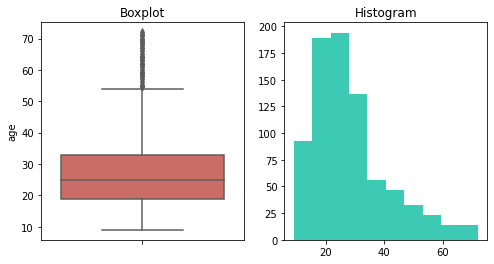

In [ ]:
explore_num(train_data, 'age')

+ The distribution of the age of the patients is skewed to the right. 
+ A bulk of the patients are between the ages of about 15 and 30
+ The mean age is about 28

Summary Statistics 

count    800.000000
mean       7.058530
std        3.788969
min       -2.594654
25%        4.527556
50%        6.893472
75%        9.892981
max       13.390868
Name: result, dtype: float64


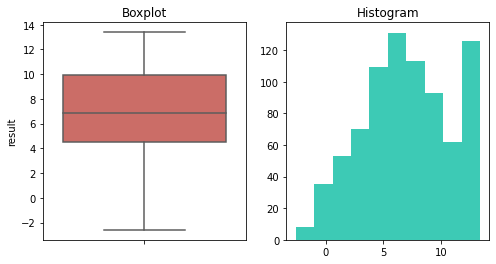

In [ ]:
explore_num(train_data, 'result')

+ There are no outliers for the score of the AQ1-10 screening test
+ About 25 observations were below 0, with -2 being the minimum
+ The majority of results were between 4 and 8 as well as 13

### Correlation among numerical variables to investigate multi-colinearity

In [ ]:
num_var = train_data[['age', 'result', 'Class/ASD']]

In [ ]:
cor = num_var.corr()

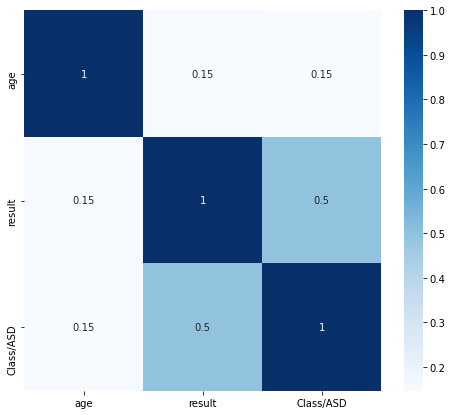

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,cmap = 'Blues')
plt.show()

+ The age and results variables have a very low correlation
+ As well as the age and target variable, Class/ASD
+ There is a moderate correlation between the results of the scores and the target variable, Class/ASD

### Inspecting Cleaned Data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               800 non-null    int64   
 1   A1_Score         800 non-null    int64   
 2   A2_Score         800 non-null    int64   
 3   A3_Score         800 non-null    int64   
 4   A4_Score         800 non-null    int64   
 5   A5_Score         800 non-null    int64   
 6   A6_Score         800 non-null    int64   
 7   A7_Score         800 non-null    int64   
 8   A8_Score         800 non-null    int64   
 9   A9_Score         800 non-null    int64   
 10  A10_Score        800 non-null    int64   
 11  age              800 non-null    int32   
 12  gender           800 non-null    category
 13  ethnicity        800 non-null    category
 14  jaundice         800 non-null    category
 15  autism           800 non-null    category
 16  country_of_res   800 non-null    category
 1

In [ ]:
train_data.shape

(800, 21)

## 3.Data-Preprocessing-for-Modeling

#### Dropping less important variables for building the model 

In [ ]:
train_data.drop(['ID', 'country_of_res', 'used_app_before', 'relation','ethnicity', 'result'], axis=1, inplace=True)

In [ ]:
train_data.shape

(800, 15)

In [ ]:
cat = train_data.select_dtypes('category')

In [ ]:
cat.head()

,gender,jaundice,autism
0,f,no,no
1,f,no,no
2,f,no,no
3,f,no,no
4,m,no,yes


**Converting categorical variables to dummy indicators**

In [ ]:
train_data = pd.get_dummies(train_data, columns = ['gender',
                                                   'jaundice',
                                                  'autism'],
                            drop_first = True)

### Re-inspecting the data

In [ ]:
train_data.dtypes

A1_Score        int64
A2_Score        int64
A3_Score        int64
A4_Score        int64
A5_Score        int64
A6_Score        int64
A7_Score        int64
A8_Score        int64
A9_Score        int64
A10_Score       int64
age             int32
Class/ASD       int64
gender_m        uint8
jaundice_yes    uint8
autism_yes      uint8
dtype: object

In [ ]:
train_data.shape

(800, 15)

In [ ]:
train_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,Class/ASD,gender_m,jaundice_yes,autism_yes
0,1,0,1,1,1,1,0,1,1,1,18,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,61,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14,0,1,0,1


In [ ]:
train_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,Class/ASD,gender_m,jaundice_yes,autism_yes
count,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.11500,0.231250,0.481250,0.245000,0.146250
std,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.88611,0.421896,0.499961,0.430356,0.353578
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.00000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data['age'].describe()

count    800.00000
mean      28.11500
std       12.88611
min        9.00000
25%       19.00000
50%       25.00000
75%       33.00000
max       72.00000
Name: age, dtype: float64

+ A general inspection of the descriptive statistics above indicates that variables have different scales which may cause models to put more weight on those with high values at the expense of those with low values.

+ To resolve this, the variables may or may not be scaled depending on the kind of algorithm that is used.



### Separating the data into target variable and predictors

In [ ]:
# predictors
X = train_data.drop('Class/ASD', axis=1)

# target variable
y = train_data['Class/ASD']

In [ ]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender_m,jaundice_yes,autism_yes
0,1,0,1,1,1,1,0,1,1,1,18,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14,0,0,0
3,0,0,0,1,0,0,0,0,0,0,61,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14,1,0,1


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Class/ASD, dtype: int64

### Splitting the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 0)

# 4.Building-of-Models

## Random Forest

**Random Forest classifier before hyperparameter tuning**

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))

train score: 1.00
test score: 0.85


**Hyperparameter tuning for Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(random_state = 0)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 0.88
Best test score: 0.89
Best parameters: {'max_features': 4, 'max_leaf_nodes': 6}


**Random Forest classifier after hyperparameter tuning**

In [ ]:
rfc = RandomForestClassifier(max_features=4,max_leaf_nodes=5,random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_y_pred = rfc.predict(X_test)

train score: 0.88
test score: 0.89


In [ ]:
print(classification_report(y_test,rfc_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       123
           1       0.79      0.70      0.74        37

    accuracy                           0.89       160
   macro avg       0.85      0.82      0.84       160
weighted avg       0.88      0.89      0.89       160



## Support Vector Machine

**Support Vector Classifier before hyperparameter tuning**

In [ ]:
svc = Pipeline([('Scaler', StandardScaler()), ('SVC',SVC(probability=True))])
svc_model = svc.fit(X_train, y_train)
print('train score: {:.2f}'.format(svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(svc_model.score(X_test,y_test)))

train score: 0.92
test score: 0.88


**Hyperparameter tuning for Support Vector Classifier**

In [ ]:
pipe = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
param_grid = {'SVC__C':[0.001,0.01,0.1,1,10,100],
            'SVC__gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid,cv =5)
grid.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid.best_score_))
print('Best train score: {:.2f}'.format(grid.score(X_train,y_train)))
print('Best test score: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best parameters:',grid.best_params_)

Best cross-validation acuracy: 0.88
Best train score: 0.88
Best test score: 0.88
Best parameters: {'SVC__C': 1, 'SVC__gamma': 0.001}


**Support Vector Classifier after hyperparameter tuning**

In [ ]:
svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C=1,gamma=0.001,probability=True))])
svc_model = svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(svc_model.score(X_test,y_test)))
svc_y_pred = svc_model.predict(X_test)

train score: 0.88
test score: 0.88


In [ ]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       123
           1       0.77      0.65      0.71        37

    accuracy                           0.88       160
   macro avg       0.84      0.80      0.81       160
weighted avg       0.87      0.88      0.87       160



## Logistic Regression

**Logistic Regression before hyperparameter tuning**

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

train score: 0.88
test score: 0.89


**Hyperparameter Tuning Logistic Regression**

In [ ]:
# Hyperparameter tuning
lr = LogisticRegression()
param_grid = {'C': [1,2,3,4,5,6,7,8,9,10,11]}
grid_lgr = GridSearchCV(lr, param_grid, cv=5)
grid_lgr.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_lgr.best_score_))
print('Best test score: {:.2f}'.format(grid_lgr.score(X_test,y_test)))
print('Best parameters:',grid_lgr.best_params_)

Best cross-validation acuracy: 0.87
Best test score: 0.89
Best parameters: {'C': 1}


**Logistic Regression after hyperparameter tuning**

In [ ]:
# Logistic regression with tuned hyper-parameters

lgr = LogisticRegression(C=1).fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))
lgr_y_pred =lgr.predict(X_test)

train score: 0.88
test score: 0.89


In [ ]:
print(classification_report(y_test,lgr_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       123
           1       0.73      0.81      0.77        37

    accuracy                           0.89       160
   macro avg       0.84      0.86      0.85       160
weighted avg       0.89      0.89      0.89       160



## Ada Boost Classifier

In [ ]:
# Instantiate a decition tree classifier
dt=DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2,random_state=42)

# Instantiate an AdaBoost classifier
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100,random_state=0)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train,y_train)
adb_y_pred = adb_clf.predict(X_test)
print('Train accuracy of AdaBoostClassifier: {:.3f}'.format(adb_clf.score(X_train,y_train)))
print('Test accuracy of AdaBoostClassifier: {:.3f}'.format(adb_clf.score(X_test,y_test)))


Train accuracy of AdaBoostClassifier: 0.886
Test accuracy of AdaBoostClassifier: 0.850


In [ ]:
print(classification_report(y_test,adb_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       123
           1       0.66      0.73      0.69        37

    accuracy                           0.85       160
   macro avg       0.79      0.81      0.80       160
weighted avg       0.86      0.85      0.85       160



# 5.Model-Evaluation-and-Comparison

In [ ]:
# 1. Random Forest
rfc_train_score =rfc.score(X_train,y_train)
rfc_test_score=rfc.score(X_test,y_test)
rfc_f1_score=f1_score(y_test,rfc_y_pred)

# 2. Support vector classifier
svc_train_score =svc_model.score(X_train,y_train)
svc_test_score=svc_model.score(X_test,y_test)
svc_f1_score=f1_score(y_test,svc_y_pred)

# 3. Logistic regression
lgr_train_score = lgr.score(X_train,y_train)
lgr_test_score = lgr.score(X_test,y_test)
lgr_f1_score =f1_score(y_test,lgr_y_pred)

# 4. Ada Boost
adb_train_score=adb_clf.score(X_train,y_train)
adb_test_score=adb_clf.score(X_test,y_test)
adb_f1_score=f1_score(y_test,adb_y_pred)


In [ ]:
Model =['Random Forest','SVC','Logistic regression','Ada Boost']

Train_accuracy = [rfc_train_score,svc_train_score,lgr_train_score,adb_train_score]

Test_accuracy = [rfc_test_score,svc_test_score,lgr_test_score,adb_test_score]

F1_score = [rfc_f1_score,svc_f1_score,lgr_f1_score,adb_f1_score]


In [ ]:
#Creating the DataFrame

Accuracy_f1_score_report=pd.DataFrame({'Model':Model,
                                        'Train_accuracy':Train_accuracy,
                                        'Test_accuracy':Test_accuracy,
                                        'F1_score':F1_score},
                                       index=np.arange(1,5,1))

#Sorting by fi_score
Accuracy_f1_score_report.sort_values(by='Test_accuracy',
                                     ascending=False,
                                     inplace=True,
                                     ignore_index=True)


Accuracy_f1_score_report.set_index('Model')


 

,Train_accuracy,Test_accuracy,F1_score
Model,,,
Random Forest,0.881250,0.8875,0.742857
Logistic regression,0.878125,0.8875,0.769231
SVC,0.915625,0.8750,0.705882
Ada Boost,0.885938,0.8500,0.692308


+ From our dataframe of accuracies and f1_scores from various models, we realize that the Random Forest and Logistic Regression models give the best accuracies and we decided on random forest is for the predictions

# 6.Implementing-the-Best-Model-on-the-Test-Data

In [ ]:
test_data = pd.read_csv(r"test.csv")

In [ ]:
# prepocessing the test data
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [ ]:
print(f"The test dataset has {test_data.shape[0]} rows and {test_data.shape[1]} columns")

The test dataset has 200 rows and 21 columns


In [ ]:
test_data = test_data.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

In [ ]:
test_data['age'] = test_data['age'].astype('int')

In [ ]:
test_data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

In [ ]:
# dropping columns that were dropped in training data

test_data.drop(['ID', 'age_desc','country_of_res', 'used_app_before', 'relation', 'ethnicity', 'result'], axis=1, inplace=True)

In [ ]:
test_data.dtypes

A1_Score      int64
A2_Score      int64
A3_Score      int64
A4_Score      int64
A5_Score      int64
A6_Score      int64
A7_Score      int64
A8_Score      int64
A9_Score      int64
A10_Score     int64
age           int32
gender       object
jaundice     object
autism       object
dtype: object

In [ ]:
test_data.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism
0,0,0,0,0,0,0,0,1,0,0,13,m,no,no
1,1,0,0,0,1,0,0,0,0,0,25,f,yes,no
2,1,0,0,1,0,1,0,1,0,0,28,f,no,no
3,1,1,1,0,1,0,1,0,1,1,16,f,yes,no
4,1,0,0,1,1,0,0,1,1,0,54,f,no,no


In [ ]:
test_data = pd.get_dummies(test_data, columns = ['gender',
                                                   'jaundice',
                                                'autism'],
                            drop_first = True)

In [ ]:
assert (X_train.columns == test_data.columns).all()


In [ ]:
test_pred = rfc.predict(test_data)

In [ ]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [ ]:
test_data['Prediction'] = test_pred

In [ ]:
test_data['Prediction'].value_counts()

0    163
1     37
Name: Prediction, dtype: int64

In [ ]:
X_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender_m,jaundice_yes,autism_yes
464,0,0,0,0,0,0,0,0,0,0,39,1,0,0
445,1,1,1,1,1,1,1,1,1,1,44,0,1,0
358,0,0,0,0,0,0,0,1,0,0,16,0,0,0
177,0,0,0,0,1,0,0,1,0,1,30,1,1,0
315,1,0,0,0,0,0,1,1,0,0,31,0,0,0


In [ ]:
X_train.to_excel('X_train.xlsx',index=False)

In [ ]:
X_test.to_excel('X_test.xlsx',index=False)

In [ ]:
y_train.to_excel('y_train.xlsx',index=False)

In [ ]:
y_train.to_excel('y_test.xlsx',index=False)

In [ ]:
import pickle
pickle.dump(rfc,open('rf_model.pickle', 'wb'))

# 8.Summary

In summary, to get the best classification model, Exploratory Data Analysis was carried out to help select input features for building models.

There were no missing values found so no rows had to be dropped. 

The original train dataset was split into train and test for building and validating models respectively.

After comparing the different classification models using F1score, and accuracy, the Random Forest model and the Support Vector Classifier models emerged as the top performing models.

The Random Forest model was however chosen and used to predict patients who had Autism Spectrum Disorder and those who did not in the test data and we found that 163 were negative and 37 were positive.

## Thank You